# Project 2: Jury Selection

The goal of this lab is to explore the connections between data science and social science. In the class we discuss statistical testing in the context of bias in jury selection. This lab is an opportunity to explore this data set and questions further.



In [1]:
from datascience import *
%matplotlib inline
path_data = './'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Jury Selection
We reproduce the jury selection example from the class here. The hyupothesis testing algorithm here is _very_ general and can be applied in many problems.

### U.S. Supreme Court, 1965: Swain vs. Alabama ###



In the early 1960's, in Talladega County in Alabama, a black man called Robert Swain was convicted of raping a white woman and was sentenced to death. He appealed his sentence, citing among other factors the all-white jury. At the time, only men aged 21 or older were allowed to serve on juries in Talladega County. In the county, 26% of the eligible jurors were black, but there were only 8 black men among the 100 selected for the jury panel in Swain's trial. No black man was selected for the trial jury.

In 1965, the Supreme Court of the United States denied Swain's appeal. In its ruling, the Court wrote "... the overall percentage disparity has been small and reflects no studied attempt to include or exclude a specified number of Negroes."

Jury panels are supposed to be selected at random from the eligible population. Because 26% of the eligible population was black, 8 black men on a panel of 100 might seem low.

### A Model ###
But one view of the data – a model, in other words – is that the panel was selected at random and ended up with a small number of black men just due to chance. This model is consistent with what the Supreme Court wrote in its ruling.

The model specifies the details of a chance process. It says the data are like a random sample from a population in which 26% of the people are black. We are in a good position to assess this model, because:
- We can simulate data based on the model. That is, we can simulate drawing at random from a population of whom 26% are black. 
- Our simulation will show what a panel *would* look like *if* it were selected at random.
- We can then compare the results of the simulation with the composition of Robert Swain's panel. 
- If the results of our simulation are not consistent with the composition of Swain's panel, that will be evidence against the model of random selection.

Let's go through the process in detail. 

### The Statistic ###
First, we have to choose a statistic to simulate. The statistic has to be able to help us decide between the model and alternative views about the data. The model says the panel was drawn at random. The alternative viewpoint, suggested by Robert Swain's appeal, is that the panel was not drawn at random because it contained too few black men. A natural statistic, then, is the number of black men in our simulated sample of 100 men representing the panel. Small values of the statistic will favor the alternative viewpoint.

### Predicting the Statistic Under the Model ###
If the model were true, how big would the statistic typically be? To answer that, we have to start by working out the details of the simulation. 

#### Generating One Value of the Statistic ####
First let's figure out how to simulate one value of the statistic. For this, we have to sample 100 times at random from the population of eligible jurors and count the number of black men we get.

One way is to set up a table representing the eligible population and use `sample` as we did in the previous chapter. But there is also a quicker way, using a `datascience` function tailored for sampling at random from categorical distributions. We will use it several times in this chapter.

The `sample_proportions` function in the `datascience` library takes two arguments:
- the sample size
- the distribution of the categories in the population, as a list or array of proportions that add up to 1

It returns an array containing the distribution of the categories in a random sample of the given size taken from the population. That's an array consisting of the sample proportions in all the different categories.

To see how to use this, remember that according to our model, the panel is selected at random from a population of men among whom 26% were black and 74% were not. Thus the distribution of the two categories can be represented as the list `[0.26, 0.74]`, which we have assigned to the name `eligible_population`. Now let's sample at random 100 times from this distribution, and see what proportions of the two categories we get in our sample.

In [5]:
eligible_population = [0.26, 0.74]
sample_proportions(100, eligible_population)

array([0.26, 0.74])

In [6]:
# count of black men in a simulated panel

(100 * sample_proportions(100, eligible_population)).item(0)

25.0

#### Running the Simulation ####
To get a sense of the variability without running the cell over and over, let's generate 10,000 simulated values of the count. The code follows the same steps that we have used in every simulation.

In [8]:
counts = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    simulated_count = (100 * sample_proportions(100, eligible_population)).item(0)
    counts = np.append(counts, simulated_count)

### The Prediction ###
To interpret the results of our simulation, we start as usual by visualizing the results by an empirical histogram.

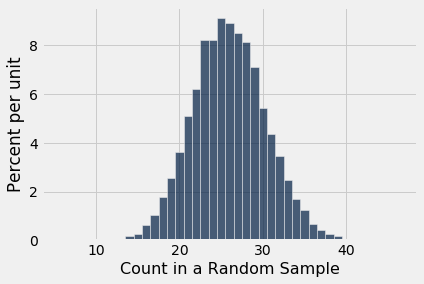

In [9]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

The histogram tells us what the model of random selection predicts about our statistic, the count of black men in the sample.

To generate each simulated count, we drew at 100 times at random from a population in which 26% were black. So, as you would expect, most of the simulated counts are around 26. They are not exactly 26 – there is some variation. The counts range between about 10 and 45. 

### Comparing the Prediction and the Data ###
Though the simulated counts are quite varied, very few of them came out to be eight or less. The value eight is far out in the left hand tail of the histogram. It's the red dot on the horizontal axis of the histogram.

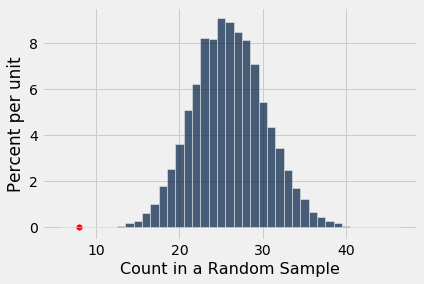

In [10]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.scatter(8, 0, color='red', s=30);

Thus the simulation shows that if we select a panel of 100 jurors at random from the eligible population, we are very unlikely to get counts of black men as low as the eight that were in Swain's jury panel. This is evidence that the model of random selection of the jurors in the panel is not consistent with the data from the panel. 

When the data and a model are inconsistent, the model is hard to justify. After all, the data are real. The model is just a set of assumptions. When assumptions are at odds with reality, we have to question those assumptions.

While it is *possible* that a panel like Robert Swain's could have been generated by chance, our simulation demonstrates that it is very unlikely. Thus our assessment is that the model of random draws is not supported by the evidence. Swain's jury panel does not look like the result of random sampling from the population of eligible jurors.

## Primary Literature

It is important to go to _primary_ references when addressing data science problems. One accessible primary reference on jury selection and bias in the statistics literature is here [https://www.jstor.org/stable/pdf/27643927.pdf](https://www.jstor.org/stable/pdf/27643927.pdf). Download this paper and try to take away one main point. Discuss it with your teammates to find out what point they took away from the paper. Often, we read papers in a group to help each other understand the concepts.

Now, look at the references for that paper or use a search tool to see if you can find another primary source on jury selection bias. Remember, the reporting of the science can sometimes miss some of the nuance of the original study, so we'll go to primary sources in this class.

## APM Jury Selection Data Set

This researcher has collected data on jury selection bias and peremtory strikes [https://github.com/APM-Reports/jury-data](https://github.com/APM-Reports/jury-data). Go to this site and have a look at the data. 

The first step in analyzing a new data set is to get a broad overview of the data set. Look at what's being measured and start to think about what questions you might be able to ask and if and how the data might inform an answer to that question. In the space below white down a few questions that you might be able to address using this data set. It might be helpful to follow the link on the site to see what kinds of questions the researcher addressed using this data set.

### Analysis of APM data

In [6]:
jurors_data = Table().read_table("jurors.csv")
trials_data = Table().read_table("trials.csv")
voir_dire_data = Table().read_table('voir_dire_answers.csv')

In [10]:
trials_data

id,defendant_name,cause_number,state_strikes,defense_strikes,county,defendant_race,second_defendant_race,third_defendant_race,fourth_defendant_race,more_than_four_defendants,judge,prosecutor_1,prosecutor_2,prosecutor_3,prosecutors_more_than_three,def_attny_1,def_attny_2,def_attny_3,def_attnys_more_than_three,offense_code_1,offense_title_1,offense_code_2,offense_title_2,offense_code_3,offense_title_3,offense_code_4,offense_title_4,offense_code_5,offense_title_5,offense_code_6,offense_title_6,more_than_six,verdict,case_appealed,batson_claim_by_defense,batson_claim_by_state,voir_dire_present
1,Terry L. Landingham,1993-9826,False,False,Attala,Black,nan,nan,nan,False,"Joseph Loper, Jr",Kevin Horan,nan,nan,False,"James H. Powell, III",nan,nan,False,97-3-7(2)(b),Aggravated Assault,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,Guilty on at least one offense,True,False,False,True
2,Donovan Johnson,2009-0023,False,True,Attala,Black,nan,nan,nan,False,"Joseph Loper, Jr",Ryan M. Berry,Mike Howie,nan,False,Rosalind H. Jordan,nan,nan,False,41-29-139(a)(1)(b)(1),sale of cocaine,41-29-139(a)(1)(b)(1),sale of cocaine,41-29-139(a)(1)(b)(1),sale of cocaine,nan,nan,nan,nan,nan,nan,False,Guilty on at least one offense,True,False,False,True
3,Sparky Watson,2004-0257,True,True,Grenada,Black,nan,nan,nan,False,"C. Morgan, III",Susan Denley,Ryan Berry,nan,False,M. Kevin Horan,Elizabeth Davis,nan,False,41-29-139(a)(1)(b)(3),sale of marihuana (less than 30 grams),41-29-139(a)(1)(b)(1),sale of cocaine,nan,nan,nan,nan,nan,nan,nan,nan,False,Guilty on at least one offense,True,False,False,True
4,Phillip Knickel,1998-0020,False,True,Montgomery,White,nan,nan,nan,False,"Joseph Loper, Jr",Doug Evans,Walter E. Bleck,nan,False,Raymond M. Baum,nan,nan,False,97-3-79,armed robbery,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,Guilty on at least one offense,True,False,False,True
5,Donald Dotson,1994-9918,False,True,Attala,Black,nan,nan,nan,False,"Joseph Loper, Jr",Doug Evans,Kevin Horan,nan,False,"James H. Powell, III",nan,nan,False,97-3-7(2)(a),Aggravated assault,97-3-7(2)(a),Aggravated assault,nan,nan,nan,nan,nan,nan,nan,nan,False,Guilty on at least one offense,True,True,False,True
6,Suzanne Ilene Tavares,1994-9942,False,False,Attala,White,nan,nan,nan,False,"Joseph Loper, Jr",Doug Evans,Kevin Horan,nan,False,"Grady F. Tollison, Jr.",Michael R. Wall,nan,False,97-3-19(2)(d),Murder,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,Guilty on at least one offense,True,False,False,True
7,Billy Joe Barnett,1994-9943,False,False,Attala,White,nan,nan,nan,False,"Joseph Loper, Jr",Doug Evans,Kevin Horan,nan,False,Jackson M. Brown,"C.M. Jackson, Jr.",Edward C. Fenwick,False,97-3-19(2)(d),Capital Murder,97-1-1(a),Conspiracy,nan,nan,nan,nan,nan,nan,nan,nan,False,Guilty on at least one offense,True,True,False,True
8,Sam Brown III,1995-10013,True,False,Attala,Black,nan,nan,nan,False,"Joseph Loper, Jr",Doug Evans,Clyde Hill,nan,False,Edward C. Fenwick,nan,nan,False,97-3-19,Murder,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,Guilty on at least one offense,True,False,False,True
9,James Rimmer,1995-10070,True,True,Attala,Black,nan,nan,nan,False,"C. Morgan, III",Kevin Horan,nan,nan,False,Eddie Fenwick,nan,nan,False,41-29-139(a)(1)(b)(1),Sale of Schedule II controlled substance: cocaine,99-7-2,multi-count (2),nan,nan,nan,nan,nan,nan,nan,nan,False,Guilty on at least one offense,True,True,True,True
10,Duman Crocker,1995-9979,True,True,Attala,White,nan,nan,nan,False,"Joseph Loper, Jr",Doug Evans,Clyde Hill,nan,False,"James H. Powell, III",nan,nan,False,97-3-19(2)(e),Capital Murder,97-17-1,Arson,nan,nan,nan,nan,nan,nan,nan,nan,False,Guilty on at least one offense,True,False,False,True


Using functions on the table, do some exploratory analysis of the data set. For example, here we'll look how the count of state strikes by defendant race.

In [14]:
trials_data.group(['state_strikes', 'defendant_race'])

state_strikes,defendant_race,count
False,Black,163
False,Unknown,8
False,White,43
True,Asian,1
True,Black,66
True,Latino,1
True,Unknown,3
True,White,20


How might you use the proportions from your exploratory analysis to in the context of the simulation tool you learned in the previous part of the project?